<a href="https://colab.research.google.com/github/jpabonl/Proyecto-experimental/blob/main/Graficas_Toma_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Librerias
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd
import os

Limpieza de datos


In [5]:
file_path = './XrayHV80kV-1uA--CG50-FG10--WS2-600nm--LiveTime300s--ConBloques.Spe'
data = np.loadtxt(file_path, skiprows=12)  # Se omite la primera fila que suele ser un encabezado


txt_file_path = './Muestras/XrayHV80kV-1uA--CG50-FG10--WS2-600nm--LiveTime300s--ConBloques.txt'
np.savetxt(txt_file_path, data, fmt='%f', delimiter='\t')

# **Calibración**

(pos 0) Mediana 1: -628.5775663169248, Mediana 2: 353.68223656082733
(pos 1) Mediana 1: 620.172341653164, Mediana 2: 580.7805115083191
(pos 2) Mediana 1: 1449.6930772747182, Mediana 2: 1160.2155061855685
(pos 3) Mediana 1: 2732.532345146534, Mediana 2: 3644.803046985109
(pos 4) Mediana 1: 2487.309753736158, Mediana 2: 4281.11060944032


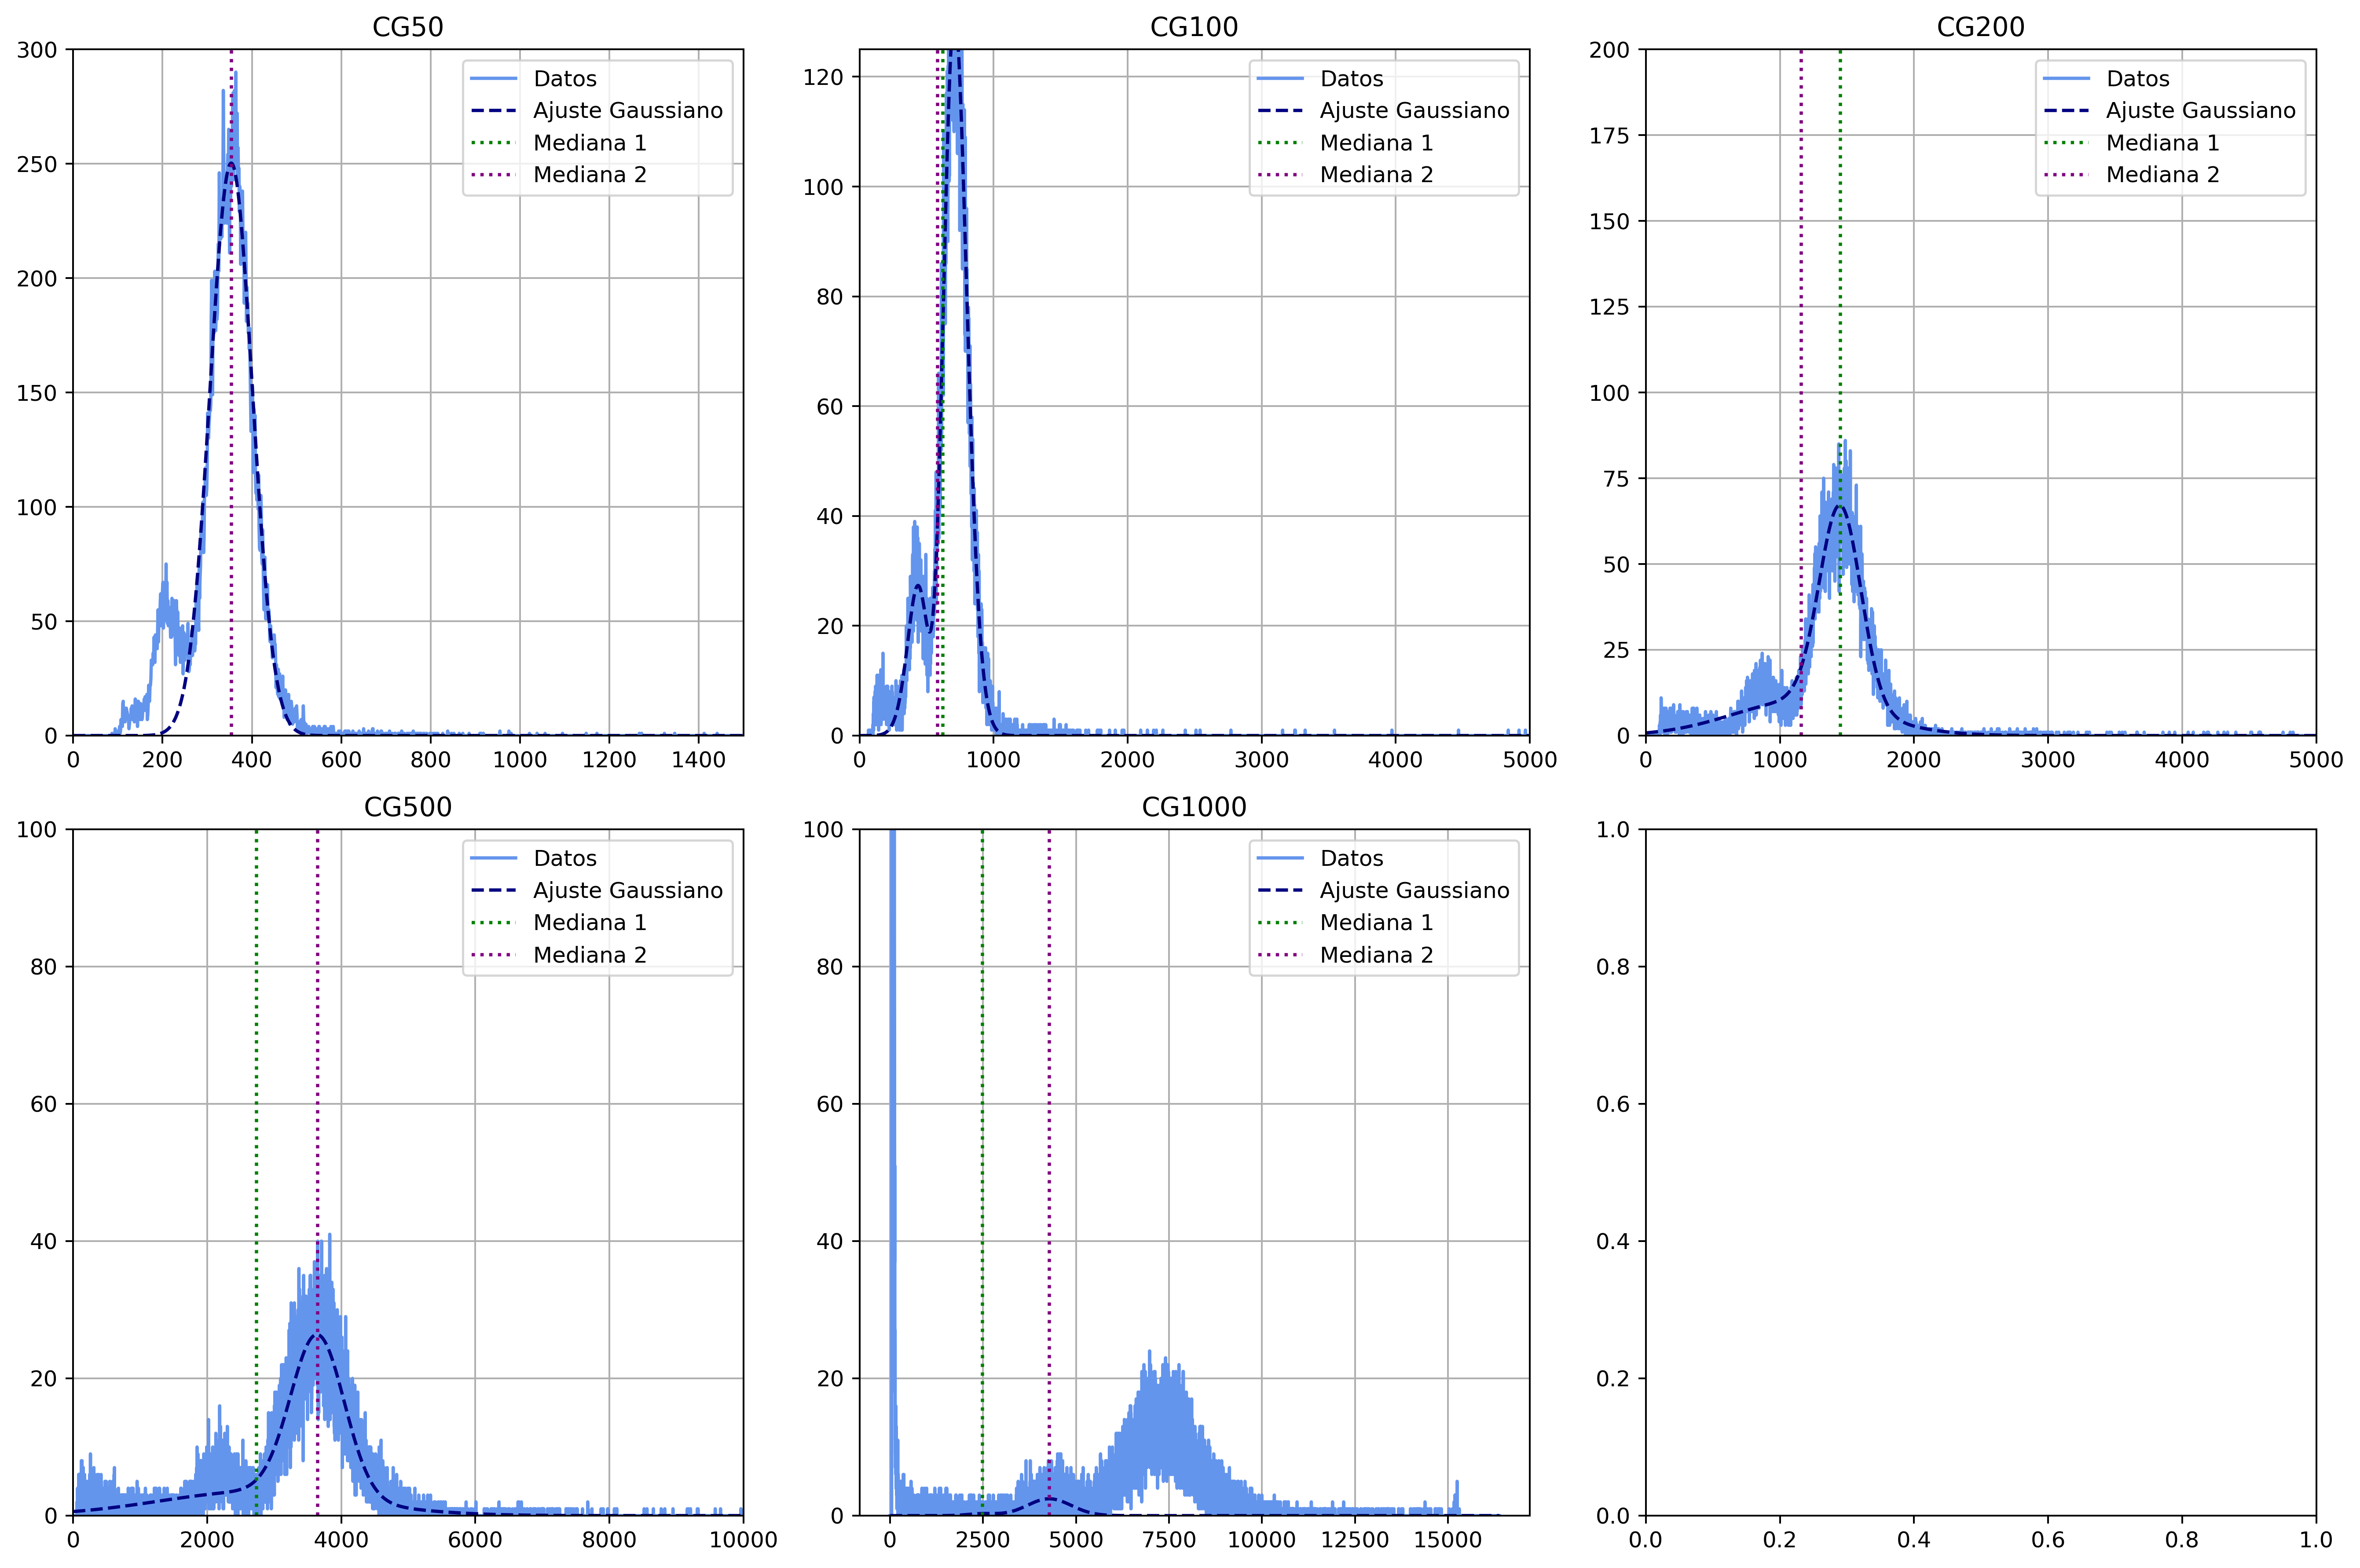

In [ ]:
plt.rcParams['figure.dpi'] = 360

configs = [
    {'cg': 'CG50', 'live_time': '120s', 'y_lim': (0, 300), 'x_lim': (0, 1500)},
    {'cg': 'CG100', 'live_time': '120s', 'y_lim': (0, 125), 'x_lim': (0, 5000)},
    {'cg': 'CG200', 'live_time': '120s', 'y_lim': (0, 200), 'x_lim': (0, 5000)},
    {'cg': 'CG500', 'live_time': '120s', 'y_lim': (0, 100), 'x_lim': (0, 10000)},
    {'cg': 'CG1000', 'live_time': '120s', 'y_lim': (0, 100)}
]

data = {}
base_path = "./Calibración/Datos/GEMHV4200-0pF-FG10-{}-bothOutputswOneUni-3Fe55onDetector-{}LiveTime.txt"

# Cargar los datos desde los archivos
for config in configs:
    file_name = base_path.format(config['cg'], config['live_time'])
    data[config['cg']] = pd.read_csv(file_name)

def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

def double_gaussian(x, amp1, mean1, stddev1, amp2, mean2, stddev2):
    return (gaussian(x, amp1, mean1, stddev1) + gaussian(x, amp2, mean2, stddev2))

def plot_with_gaussian_fit(ax, data, initial_guess):
    x_data = np.arange(len(data))
    y_data = data.values.flatten()

    # ajustar a la función double_gaussian
    popt, pcov = curve_fit(double_gaussian, x_data, y_data, p0=initial_guess)

    # crear datos para la curva ajustada
    x_fit = np.linspace(x_data.min(), x_data.max(), len(data))
    y_fit = double_gaussian(x_fit, *popt)

    # graficar los datos originales y el ajuste
    ax.plot(x_data, y_data, label='Datos', c='cornflowerblue')
    ax.plot(x_fit, y_fit, label='Ajuste Gaussiano', linestyle='--', c='navy')

    # retornar los parámetros
    return popt

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
initial_guesses = [
    [50, 100, 10, 150, 250, 20],
    [150, 200, 250, 300, 350, 40],
    [200, 250, 300, 350, 400, 40],
    [50, 100, 10, 150, 250, 20],
    [200, 2500, 100, 100, 4100, 300],
    [150, 4000, 100, 300, 9000, 200],
]

for i, (ax, config) in enumerate(zip(axes.flatten(), configs)):
    file_name = base_path.format(config['cg'], config['live_time'])
    data = pd.read_csv(file_name)

    popt = plot_with_gaussian_fit(ax, data, initial_guesses[i])

    # mostrar la mediana de los ajustes (el valor del eje x de la línea)
    median1 = popt[1]
    median2 = popt[4]
    print(f'(pos {i}) Mediana 1: {median1}, Mediana 2: {median2}')
    ax.axvline(median1, color='green', linestyle=':', label='Mediana 1')
    ax.axvline(median2, color='purple', linestyle=':', label='Mediana 2')

    # configurar los límites y títulos
    ax.set_ylim(config['y_lim'])
    if 'x_lim' in config:
        ax.set_xlim(config['x_lim'])
    ax.set_title(config['cg'])
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()

Graficas

In [6]:
Pos1Ref1 = pd.read_csv("Muestras/XrayHV80kV-1uA--CG50-FG10--Pos1-Ref-1Filtro--LiveTime300s--ConBloques.txt")
Pos3WS2 = pd.read_csv("Muestras/XrayHV80kV-1uA--CG50-FG10--Pos3-WS2-450nm--LiveTime300s--ConBloques.txt")
Pos6WS2 = pd.read_csv("Muestras/XrayHV80kV-1uA--CG50-FG10--Pos6-WS2-500nm--LiveTime300s--ConBloques.txt")
Pos7WS2 = pd.read_csv("Muestras/XrayHV80kV-1uA--CG50-FG10--Pos7-WS2-400nm--LiveTime300s--ConBloques.txt")
WS21000 = pd.read_csv("Muestras/XrayHV80kV-1uA--CG50-FG10--WS2-1000nm--LiveTime300s--ConBloques.txt")
WS2850 = pd.read_csv("Muestras/XrayHV80kV-1uA--CG50-FG10--WS2-850nm--LiveTime300s--ConBloques.txt")
WS2750 = pd.read_csv("Muestras/XrayHV80kV-1uA--CG50-FG10--WS2-750nm--LiveTime300s--ConBloques.txt")
WS2600 = pd.read_csv("Muestras/XrayHV80kV-1uA--CG50-FG10--WS2-600nm--LiveTime300s--ConBloques.txt")
Bulk1 = pd.read_csv("Muestras/XrayHV80kV-1uA--CG50-FG10--Pos4-Bulk1-W-300nm--LiveTime300s--ConBloques.txt")
Bulk2 = pd.read_csv("Muestras/XrayHV80kV-1uA--CG50-FG10--Pos5-Bulk2-W-500nm--LiveTime300s--ConBloques.txt")

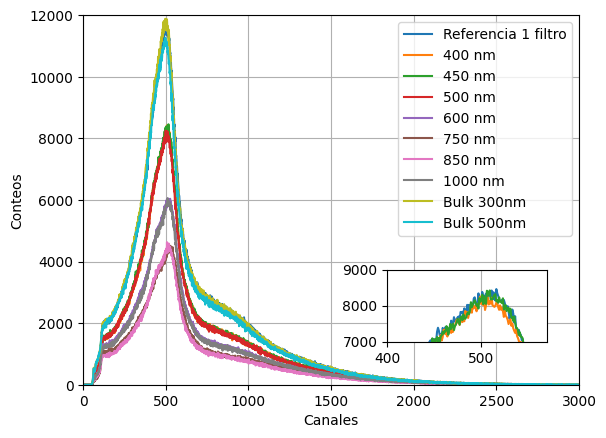

In [7]:
plt.plot(Pos1Ref1, label='Referencia 1 filtro')
plt.plot(Pos7WS2, label='400 nm')
plt.plot(Pos3WS2, label='450 nm')
plt.plot(Pos6WS2, label='500 nm')
plt.plot(WS2600, label='600 nm')
plt.plot(WS2750, label='750 nm')
plt.plot(WS2850, label='850 nm')
plt.plot(WS21000, label='1000 nm')
plt.plot(Bulk1, label='Bulk 300nm')
plt.plot(Bulk2, label='Bulk 500nm')
plt.ylim(0,12000)
plt.xlim(0,3000)
plt.ylabel('Conteos')
plt.xlabel('Canales')
plt.grid(True)
plt.legend()
# Definir los límites para el zoom-in
xmin = 400
xmax = 570
ymin = 7000
ymax = 9000

# Crear un área para el zoom-in en la esquina derecha
zoom_ax = plt.axes([0.60, 0.2, 0.25, 0.15])  # [left, bottom, width, height]
zoom_ax.plot(Pos3WS2, label="450nm")
zoom_ax.plot(Pos6WS2, label="500nm")
zoom_ax.plot(Pos7WS2, label="400nm")
zoom_ax.set_ylim(ymin, ymax)
zoom_ax.set_xlim(xmin, xmax)

zoom_ax.grid()

# Mostrar la leyenda en la gráfica principal
plt.grid(True)
plt.show()

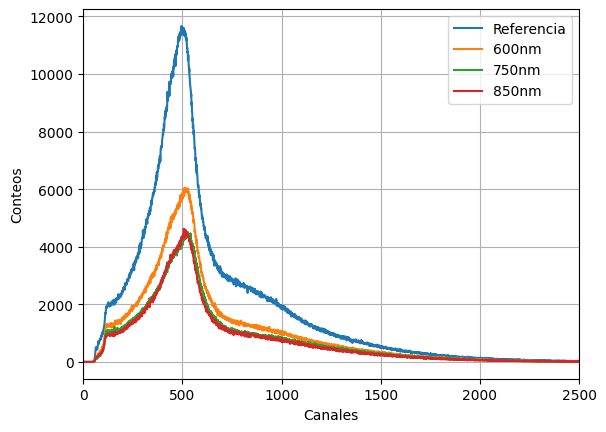

In [ ]:
plt.plot(Pos1Ref1, label='Referencia')
plt.plot(WS2600, label='600nm')
plt.plot(WS2750, label='750nm')
plt.plot(WS2850, label='850nm')
plt.xlim(0,2500)
plt.xlabel('Canales')
plt.ylabel('Conteos')
plt.legend()
plt.grid(True)
plt.show()

Normalización de las grficas de WS2

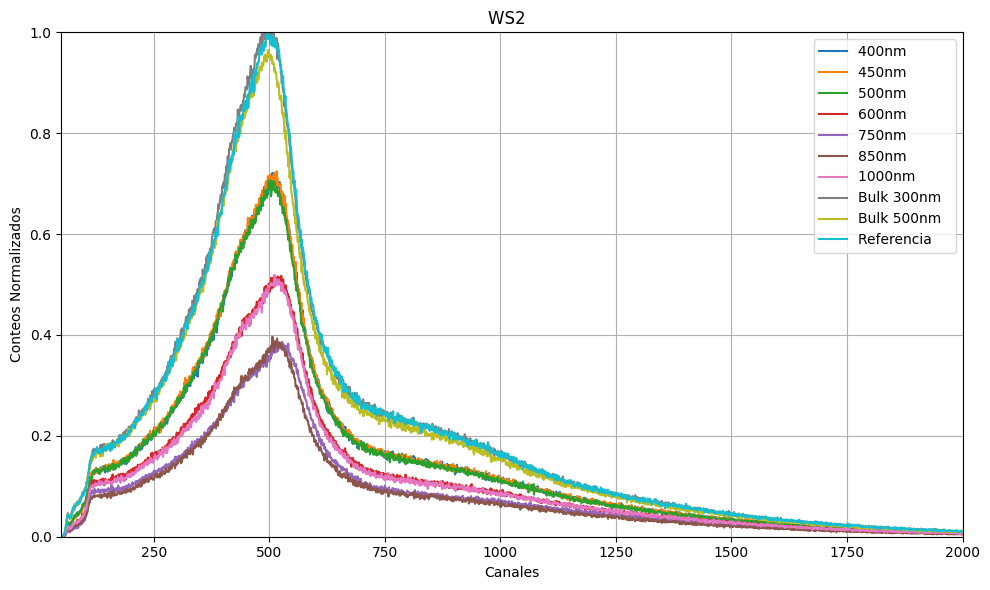

Diferencia relativa media de Pos3WS2_normalized respecto a Pos1Ref_normalized: 0.7066090045374327
Diferencia relativa media de Pos6WS2_normalized respecto a Pos1Ref_normalized: 0.7459155337991432
Diferencia relativa media de Pos7WS2_normalized respecto a Pos1Ref_normalized: 0.7239530432642235
Diferencia relativa media de WS2600_normalized respecto a Pos1Ref_normalized: 1.158010103164079
Diferencia relativa media de WS2750_normalized respecto a Pos1Ref_normalized: 1.461799100903025
Diferencia relativa media de WS2850_normalized respecto a Pos1Ref_normalized: 1.5125607505554304
Diferencia relativa media de WS21000_normalized respecto a Pos1Ref_normalized: 1.1889286243117498
Diferencia relativa media de Bulk1_normalized respecto a Pos1Ref_normalized: 0.07287896031588745
Diferencia relativa media de Bulk2_normalized respecto a Pos1Ref_normalized: 0.12059546541258179


In [13]:
# Calcular los máximos y mínimos de Pos1Ref
max_Pos1Ref1 = np.max(Pos1Ref1)
min_Pos1Ref1 = np.min(Pos1Ref1)

# Normalizar los datos de Pos2WS2 y Pos3WS2 utilizando los máximos y mínimos de Pos1Ref
Pos3WS2_normalized = (Pos3WS2 - min_Pos1Ref1) / (max_Pos1Ref1 - min_Pos1Ref1)
Pos6WS2_normalized = (Pos6WS2 - min_Pos1Ref1) / (max_Pos1Ref1 - min_Pos1Ref1)
Pos7WS2_normalized = (Pos7WS2 - min_Pos1Ref1) / (max_Pos1Ref1 - min_Pos1Ref1)
WS2600_normalized = (WS2600 - min_Pos1Ref1) / (max_Pos1Ref1 - min_Pos1Ref1)
WS2750_normalized = (WS2750 - min_Pos1Ref1) / (max_Pos1Ref1 - min_Pos1Ref1)
WS21000_normalized = (WS21000 - min_Pos1Ref1) / (max_Pos1Ref1 - min_Pos1Ref1)
WS2850_normalized = (WS2850 - min_Pos1Ref1) / (max_Pos1Ref1 - min_Pos1Ref1)
Bulk1_normalized = (Bulk1 - min_Pos1Ref1) / (max_Pos1Ref1 - min_Pos1Ref1)
Bulk2_normalized = (Bulk2 - min_Pos1Ref1) / (max_Pos1Ref1 - min_Pos1Ref1)
Pos1Ref1_normalized = (Pos1Ref1 - min_Pos1Ref1) / (max_Pos1Ref1 - min_Pos1Ref1)

# Graficar la función original y la función normalizada
plt.figure(figsize=(10, 6))

#plt.subplot(1, 2, 1)
#plt.plot(Pos7WS2, label='400nm ')
#plt.plot(Pos3WS2, label='450nm ')
#plt.plot(Pos6WS2, label='500nm ')
#plt.plot(WS2600, label='600nm')
#plt.plot(WS2750, label='750nm')
##plt.plot(WS2850, label='850nm ')
#plt.plot(WS21000, label='1000nm ')
#plt.plot(Bulk1, label='Bulk 300nm ')
#plt.plot(Bulk2, label='Bulk 500nm ')
#plt.plot(Pos1Ref1, label='Referencia ')
#plt.xlim(50, 1000)
#plt.ylim(0, 15000)
#plt.grid()
#plt.title('WS2')
#plt.ylabel('Conteos')
#plt.xlabel('Canales')
#plt.legend()

#lt.subplot(1, 2, 2)
plt.plot(Pos7WS2_normalized, label='400nm  ')
plt.plot(Pos3WS2_normalized, label='450nm  ')
plt.plot(Pos6WS2_normalized, label='500nm  ')
plt.plot(WS2600_normalized, label='600nm  ')
plt.plot(WS2750_normalized, label='750nm  ')
plt.plot(WS2850_normalized, label='850nm  ')
plt.plot(WS21000_normalized, label='1000nm  ')
plt.plot(Bulk1_normalized, label='Bulk 300nm  ')
plt.plot(Bulk2_normalized, label='Bulk 500nm  ')
plt.plot(Pos1Ref1_normalized, label='Referencia  ')
plt.xlim(50, 2000)
plt.ylim(0, 1)
plt.grid()
plt.title('WS2  ')
plt.ylabel('Conteos Normalizados')
plt.xlabel('Canales')
plt.legend()

plt.tight_layout()
plt.show()



# Calcular la diferencia relativa entre Pos3WS2_normalized y Pos1Ref_normalized
diff_Pos3WS2 = np.abs(Pos3WS2_normalized - Pos1Ref1_normalized)
diff_Pos6WS2 = np.abs(Pos6WS2_normalized - Pos1Ref1_normalized)
diff_Pos7WS2 = np.abs(Pos7WS2_normalized - Pos1Ref1_normalized)
diff_WS2600 = np.abs(WS2600_normalized - Pos1Ref1_normalized)
diff_WS2750 = np.abs(WS2750_normalized - Pos1Ref1_normalized)
diff_WS2850 = np.abs(WS2850_normalized - Pos1Ref1_normalized)
diff_WS21000 = np.abs(WS21000_normalized - Pos1Ref1_normalized)
diff_Bulk1 = np.abs(Bulk1_normalized - Pos1Ref1_normalized)
diff_Bulk2 = np.abs(Bulk2_normalized - Pos1Ref1_normalized)
# Calcular el promedio de las diferencias relativas
mean_diff_Pos3WS2 = np.mean(diff_Pos3WS2)*100
mean_diff_Pos6WS2 = np.mean(diff_Pos6WS2)*100
mean_diff_Pos7WS2 = np.mean(diff_Pos7WS2)*100
mean_diff_WS2600 = np.mean(diff_WS2600)*100
mean_diff_WS2750 = np.mean(diff_WS2750)*100
mean_diff_WS2850 = np.mean(diff_WS2850)*100
mean_diff_WS21000 = np.mean(diff_WS21000)*100
mean_diff_Bulk1 = np.mean(diff_Bulk1)*100
mean_diff_Bulk2 = np.mean(diff_Bulk2)*100


print("Diferencia relativa media de Pos3WS2_normalized respecto a Pos1Ref_normalized:", mean_diff_Pos3WS2)
print("Diferencia relativa media de Pos6WS2_normalized respecto a Pos1Ref_normalized:", mean_diff_Pos6WS2)
print("Diferencia relativa media de Pos7WS2_normalized respecto a Pos1Ref_normalized:", mean_diff_Pos7WS2)
print("Diferencia relativa media de WS2600_normalized respecto a Pos1Ref_normalized:", mean_diff_WS2600)
print("Diferencia relativa media de WS2750_normalized respecto a Pos1Ref_normalized:", mean_diff_WS2750)
print("Diferencia relativa media de WS2850_normalized respecto a Pos1Ref_normalized:", mean_diff_WS2850)
print("Diferencia relativa media de WS21000_normalized respecto a Pos1Ref_normalized:", mean_diff_WS21000)
print("Diferencia relativa media de Bulk1_normalized respecto a Pos1Ref_normalized:", mean_diff_Bulk1)
print("Diferencia relativa media de Bulk2_normalized respecto a Pos1Ref_normalized:", mean_diff_Bulk2)
